In [287]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [288]:
import numpy as np
import matplotlib
%matplotlib inline

In [289]:
import champy.plot_chameleon as plt_chi
import champy.sim_chameleon as sim_chi
import champy.runs_chameleon as run_chi
import champy.units as units

# All-in-one

Running STAR-like simulation (potential)
Running simulation 1/3
Running simulation 2/3
Running simulation 3/3
Waiting for subprocesses to finish (3/3)
Saving results
Plot and save.


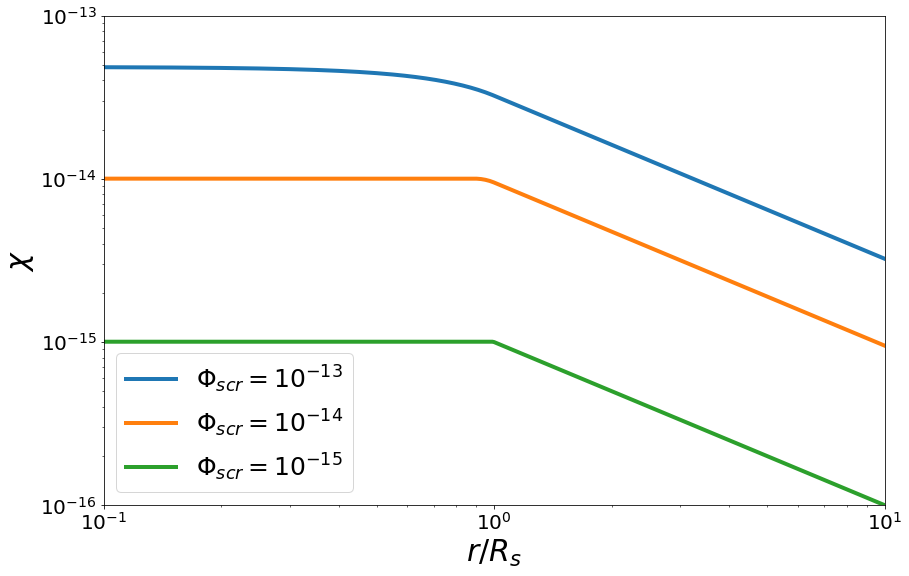

Running STAR-like simulation (forces)
Running simulation 1/6
Running simulation 2/6
Running simulation 3/6
Running simulation 4/6
Running simulation 5/6
Running simulation 6/6
Waiting for subprocesses to finish (6/6)
Saving results
Plot and save.


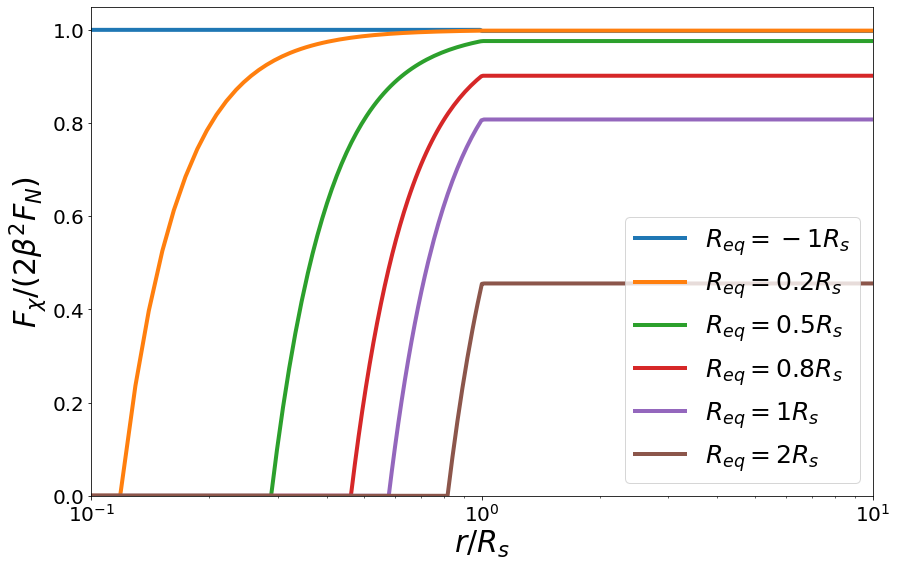

Running NFW-like simulation (forces)
Running simulation 1/5
Running simulation 2/5
Running simulation 3/5
Running simulation 4/5
Running simulation 5/5
Waiting for subprocesses to finish (5/5)
Saving results
Plot and save.


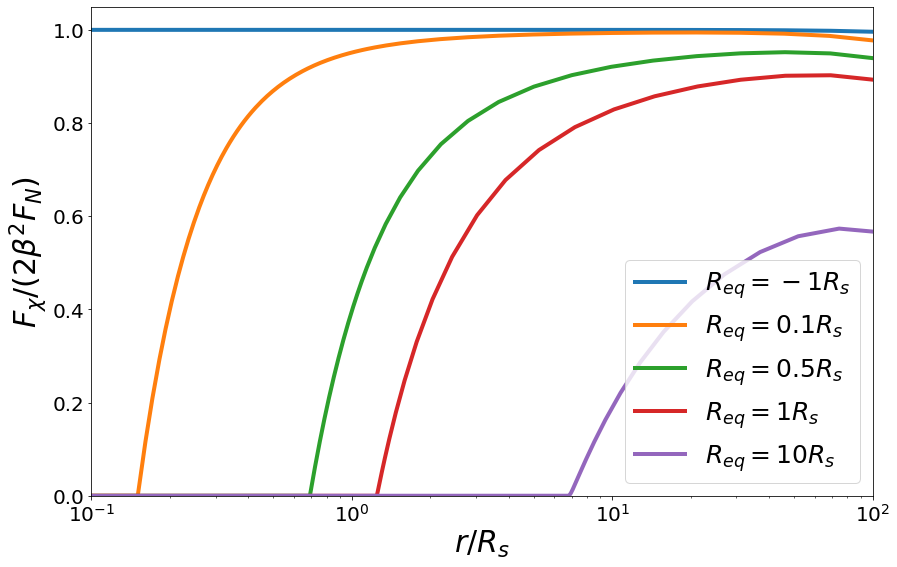

Running NFW-like simulation (forces)
Running simulation 1/3
Running simulation 2/3
Running simulation 3/3
Waiting for subprocesses to finish (3/3)
Saving results
Plot and save.


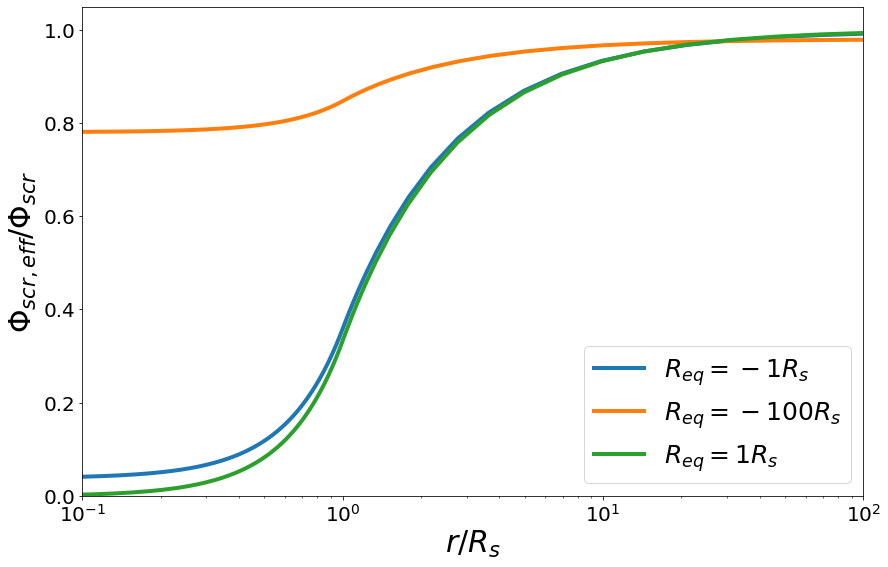

In [349]:
run_chi.main()

# Run many simulations

In [341]:
kwargs_dflt = {
    "err": 1E-12,
    "n": 0.5,
    "print_par" : 1,
    "out_dir" : "../output/",
    "step": 1E-2,
    "mod" : 1,
    "Omega_m" : 1,
}

kwargs_sims = {
#     "c" : [4, 6, 16],
    "c": 4,
    "M200_sun": 1E2,
#     "M200_sun" : [1E-2, 1E0, 1E2],
#     "Ys" : [1E-6, 1E-3, 1E0, 1E1],
#     "R": 100,
    "R_eq" : [-1, -100, 1],
#     "R_eq" : 10,
    "Ys" : 0,
}

In [342]:
results_all = sim_chi.run_many_sims(kwargs_dflt, kwargs_sims, stdout=None, parallel=True)

Running simulation 1/3
Running simulation 2/3
Running simulation 3/3
Waiting for subprocesses to finish (3/3)
Saving results


# Plots

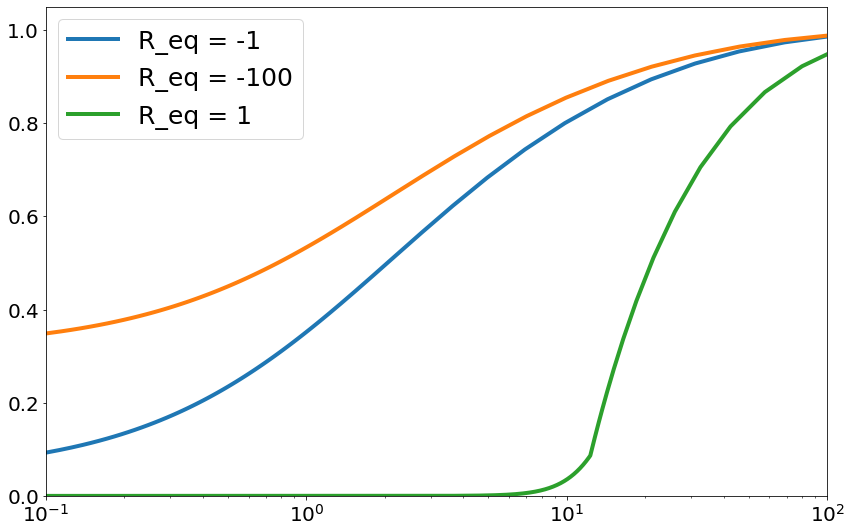

In [345]:
sim_chi.plot_simulations(results_all, p_type='potential', data_col=3, label_by=['R_eq'], xmin=1e-1, xmax=1e2, yscale='linear', ymin=0)

In [316]:
units.get_omega_for_nfw(2000, 4E2)

95.04066956366574

In [286]:
results_all[3]['potential'][3]

array([0.000000e+00, 3.649616e-14, 1.465688e-13, ..., 9.944532e-01,
       9.990117e-01, 9.999548e-01])